In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import ast
import matplotlib.ticker as mtick

In [5]:
def get_data(mode):
#     mapper = {1:"normalized_allocation"}
    mapper = {1:"normalized_normal", 2:"normalized_allocation"}
    data_dict = {}
    iter = 1
    if mode == "upwardsConsistency":
        with open(f"./aws-inferDiff-Jan-03/{mode}-1.csv", "r") as file:
            for line in file:
                data = ast.literal_eval(line)
                data_dict[mapper[iter]] = data
    else:
        with open(f"./aws-inferDiff-Jan-03/{mode}-1.csv", "r") as file:
            for line in file:
                data = ast.literal_eval(line)
                data_dict[mapper[iter]] = data
                iter += 1
                if iter == 5:
                    break
    return data_dict

In [6]:
upwards = get_data("upwardsConsistency")
bothDirections = get_data("bothDirectionsConsistency")

In [7]:
def dataProcessing(mode, data_dict):
    bws = [900 + i for i in range(0,600,150)]
    deltas = [10, 30, 50, 100]
    combinations = [i for i in range(7)]
    res_dict = {}
    iter = 0
    for delta in deltas:
        for comb in combinations:
            for bw in bws:
                key = f"consistency({bw}, {delta})"
                if not key in res_dict:
                    res_dict[key] = [data_dict[mode][iter]/7, [data_dict[mode][iter]]]
                else:
                    res_dict[key][0] += data_dict[mode][iter]/7
                    res_dict[key][1].append(data_dict[mode][iter])
                iter += 1
    return res_dict

In [51]:
upwardsDict = dataProcessing("allocation", upwards)

In [34]:
upwardsDict

{'consistency(900,10)': [0.7119318181818183,
  [1.0,
   1.0,
   0.7272727272727273,
   0.6,
   0.4166666666666667,
   0.8333333333333334,
   0.40625]],
 'consistency(1050,10)': [0.6011595547309833,
  [0.8571428571428571,
   0.6666666666666666,
   0.625,
   0.5714285714285714,
   0.2,
   0.8333333333333334,
   0.45454545454545453]],
 'consistency(1200,10)': [0.764378478664193,
  [0.7, 1.0, 0.7142857142857143, 0.8, 0.6363636363636364, 1.0, 0.5]],
 'consistency(1350,10)': [0.7838042909471481,
  [0.9230769230769231,
   0.9230769230769231,
   0.8571428571428571,
   1.0,
   0.5,
   0.8666666666666667,
   0.4166666666666667]],
 'consistency(900,30)': [0.5317054681109981,
  [0.2727272727272727,
   0.8181818181818182,
   0.4666666666666667,
   0.8095238095238095,
   0.5,
   0.5,
   0.3548387096774194]],
 'consistency(1050,30)': [0.7421239365736519,
  [0.6470588235294118,
   0.9,
   0.7096774193548387,
   0.8181818181818182,
   0.625,
   0.7727272727272727,
   0.7222222222222222]],
 'consistency

In [8]:
# bothDirNormal = dataProcessing("normal", bothDirections)
# bothDirNormalizedNormal = dataProcessing("normalized_normal", bothDirections)
# bothDirAllocation = dataProcessing("allocation", bothDirections)
bothDirNormalizedAllocation = dataProcessing("normalized_allocation", bothDirections)

In [9]:
bothDirNormalizedAllocationRanked = dict(list(bothDirNormalizedAllocation.items())[4:12])
bothDirNormalizedAllocationRanked

{'consistency(900, 30)': [0.4288475094398439,
  [0.0,
   0.9090909090909091,
   0.2857142857142857,
   0.7777777777777778,
   0.2926829268292683,
   0.4166666666666667,
   0.32]],
 'consistency(1050, 30)': [0.5771984524804074,
  [0.42857142857142855,
   0.8,
   0.7037037037037037,
   0.6666666666666666,
   0.55,
   0.5789473684210527,
   0.3125]],
 'consistency(1200, 30)': [0.566962366390284,
  [0.6363636363636364,
   0.8928571428571429,
   0.4,
   0.5789473684210527,
   0.5454545454545454,
   0.5238095238095238,
   0.391304347826087]],
 'consistency(1350, 30)': [0.6085600907029478,
  [0.2222222222222222,
   0.8888888888888888,
   0.6,
   0.8571428571428571,
   0.6666666666666666,
   0.65,
   0.375]],
 'consistency(900, 50)': [0.5079475948300359,
  [0.35294117647058826,
   0.7222222222222222,
   0.56,
   0.8333333333333334,
   0.3793103448275862,
   0.34782608695652173,
   0.36]],
 'consistency(1050, 50)': [0.45751836654873884,
  [0.11764705882352941,
   0.8529411764705882,
   0.470588

In [49]:
bothDirNormalizedAllocationRanked

{'consistency(900, 30)': [0.7077274577274576,
  [0.48148148148148145,
   0.7307692307692307,
   0.8181818181818182,
   0.7948717948717948,
   0.7727272727272727,
   0.6060606060606061,
   0.75]],
 'consistency(1050, 30)': [0.7742455495023708,
  [0.6206896551724138,
   0.9166666666666666,
   0.7727272727272727,
   0.7777777777777778,
   0.7777777777777778,
   0.6129032258064516,
   0.9411764705882353]],
 'consistency(1200, 30)': [0.7723275151230816,
  [0.5625,
   0.8285714285714286,
   0.8275862068965517,
   0.7666666666666667,
   0.9090909090909091,
   0.6896551724137931,
   0.8222222222222222]],
 'consistency(1350, 30)': [0.7964882578864342,
  [0.6666666666666666,
   0.9393939393939394,
   0.7037037037037037,
   0.8,
   0.8,
   0.8571428571428571,
   0.8085106382978723]],
 'consistency(900, 50)': [0.6713113275613276,
  [0.4583333333333333,
   0.8125,
   0.8484848484848485,
   0.65625,
   0.6666666666666666,
   0.4444444444444444,
   0.8125]],
 'consistency(1050, 50)': [0.7326124426802

In [50]:
def findIndex(dictionary, val):
    for key in dictionary.keys():
        if val in dictionary[key][1]:
            index = dictionary[key][1].index(val)
            dictionary[key][1][index] = 0
            return key, index

In [52]:
from copy import deepcopy
# Top 10 consistencies
combinations = {0:"- jakarta miami coldwater",
1: "- aberdeen india lagrange",
2: "- aberdeen timesquare jakarta-uav",
3: "- boston india tilton",
4: "- hochiminh miami roppongi",
5: "- boston jakarta lagrange",
6: "- hochiminh roppongi timesquare"}

total = []
dict_copy = deepcopy(bothDirNormalizedAllocationRanked)
for arr in bothDirNormalizedAllocationRanked.values():
    total += arr[1]
used = []
for i in range(20):
    maxCon = max(total)
    key, index = findIndex(dict_copy, maxCon)
    print(f"{i+1}. {key[:-1]},{combinations[index][1:]}) - {round(maxCon, 2)}")
    used.append(f"{key[:-1]},{combinations[index][1:]})")
    total.pop(total.index(maxCon))
used

1. consistency(1050, 30, hochiminh roppongi timesquare) - 0.94
2. consistency(1350, 30, aberdeen india lagrange) - 0.94
3. consistency(1050, 30, aberdeen india lagrange) - 0.92
4. consistency(1200, 30, hochiminh miami roppongi) - 0.91
5. consistency(1050, 50, hochiminh miami roppongi) - 0.89
6. consistency(1350, 30, boston jakarta lagrange) - 0.86
7. consistency(900, 50, aberdeen timesquare jakarta-uav) - 0.85
8. consistency(1200, 30, aberdeen india lagrange) - 0.83
9. consistency(1200, 30, aberdeen timesquare jakarta-uav) - 0.83
10. consistency(1200, 30, hochiminh roppongi timesquare) - 0.82
11. consistency(1050, 50, hochiminh roppongi timesquare) - 0.82
12. consistency(900, 30, aberdeen timesquare jakarta-uav) - 0.82
13. consistency(900, 50, aberdeen india lagrange) - 0.81
14. consistency(900, 50, hochiminh roppongi timesquare) - 0.81
15. consistency(1350, 30, hochiminh roppongi timesquare) - 0.81
16. consistency(1350, 30, boston india tilton) - 0.8
17. consistency(1350, 30, hochimin

['consistency(1050, 30, hochiminh roppongi timesquare)',
 'consistency(1350, 30, aberdeen india lagrange)',
 'consistency(1050, 30, aberdeen india lagrange)',
 'consistency(1200, 30, hochiminh miami roppongi)',
 'consistency(1050, 50, hochiminh miami roppongi)',
 'consistency(1350, 30, boston jakarta lagrange)',
 'consistency(900, 50, aberdeen timesquare jakarta-uav)',
 'consistency(1200, 30, aberdeen india lagrange)',
 'consistency(1200, 30, aberdeen timesquare jakarta-uav)',
 'consistency(1200, 30, hochiminh roppongi timesquare)',
 'consistency(1050, 50, hochiminh roppongi timesquare)',
 'consistency(900, 30, aberdeen timesquare jakarta-uav)',
 'consistency(900, 50, aberdeen india lagrange)',
 'consistency(900, 50, hochiminh roppongi timesquare)',
 'consistency(1350, 30, hochiminh roppongi timesquare)',
 'consistency(1350, 30, boston india tilton)',
 'consistency(1350, 30, hochiminh miami roppongi)',
 'consistency(900, 30, boston india tilton)',
 'consistency(1050, 30, boston india t

In [10]:
def barChartPlotter(data_dict):
    x = np.array([key for key in data_dict.keys()])
    y = np.array([data[0] for data in data_dict.values()]) * 100
    plt.rcParams.update({'font.size': 10})
    plt.bar(x,y)
    plt.ylabel("Consistency (%)")
    plt.xticks(rotation=30, ha='right')
    plt.show()

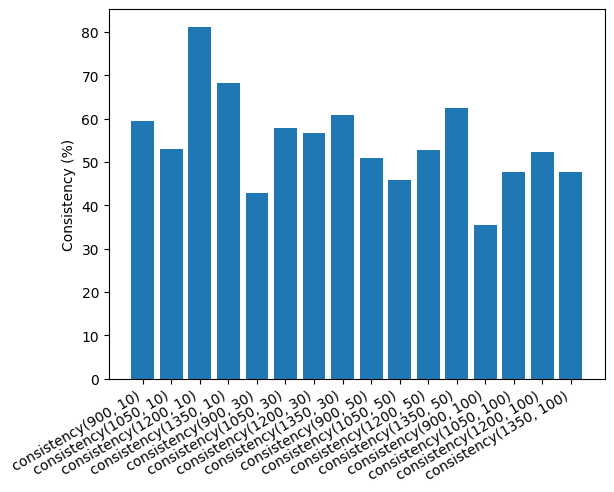

In [11]:
barChartPlotter(bothDirNormalizedAllocation)

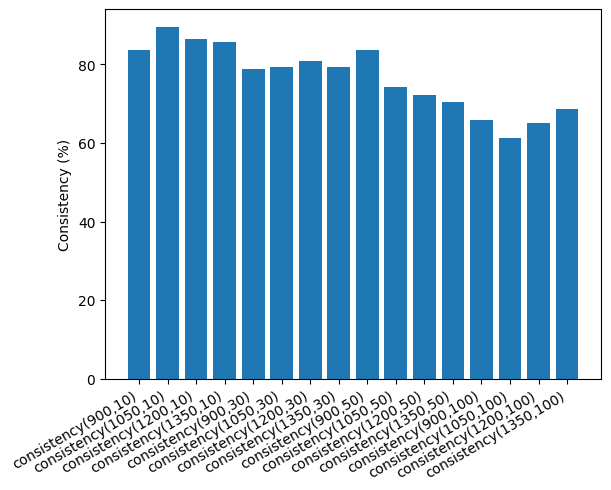

In [17]:
barChartPlotter(upwardsDict)

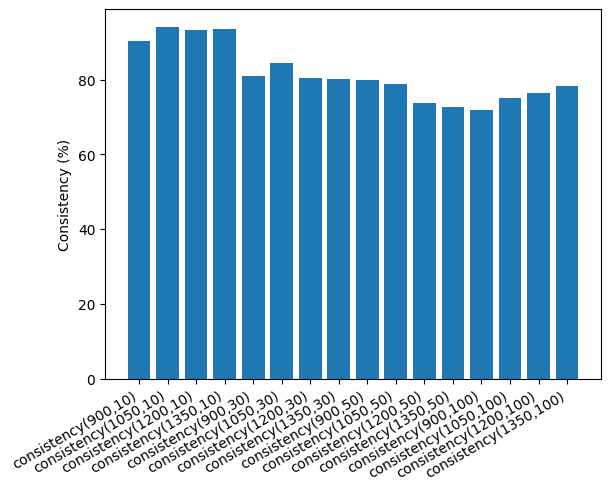

In [18]:
barChartPlotter(bothDirNormal)

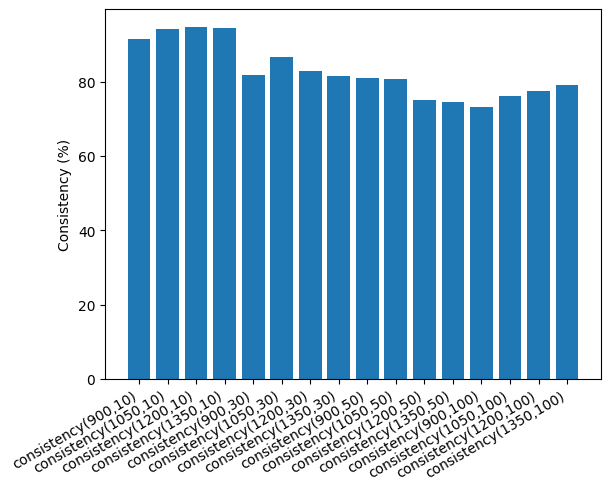

In [19]:
barChartPlotter(bothDirNormalizedNormal)

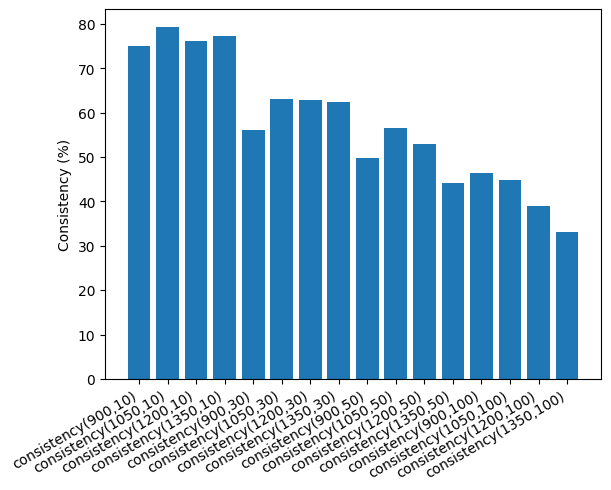

In [20]:
barChartPlotter(bothDirAllocation)

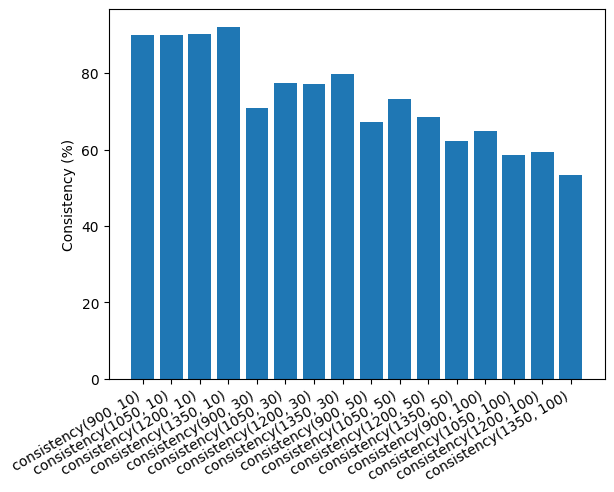

In [10]:
barChartPlotter(bothDirNormalizedAllocation)

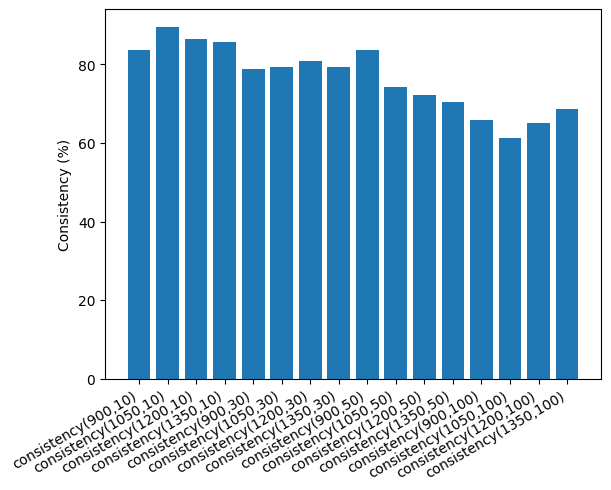

In [22]:
barChartPlotter(upwardsDict)

In [12]:
def boxPlotter(data_dict):
#     totalExperiments = 24
#     data_1 = m[0:totalExperiments:4]
#     data_2 = m[1:totalExperiments:4]
#     data_3 = m[2:totalExperiments:4]
#     data_4 = m[3:totalExperiments:4]

    data = [data[1] for data in data_dict.values()]
    fig = plt.figure(figsize=(16, 8))
    plt.rcParams.update({'font.size': 20})
    ax = fig.add_axes([0, 0, 1, 1])

    ax.set_xticklabels([key for key in data_dict.keys()], rotation=30, ha="right")

#     ax.set_xlabel("Total Bandwidth (kbps)")
#     ax.set_ylabel("Improvement")
    ax.set_ylabel("Consistency (%)")
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

    # Creating plot
    bp = ax.boxplot(data)

    # show plot
    plt.tight_layout()
    plt.show()

/home/cc/miniconda3/envs/dds/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]
/home/cc/miniconda3/envs/dds/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


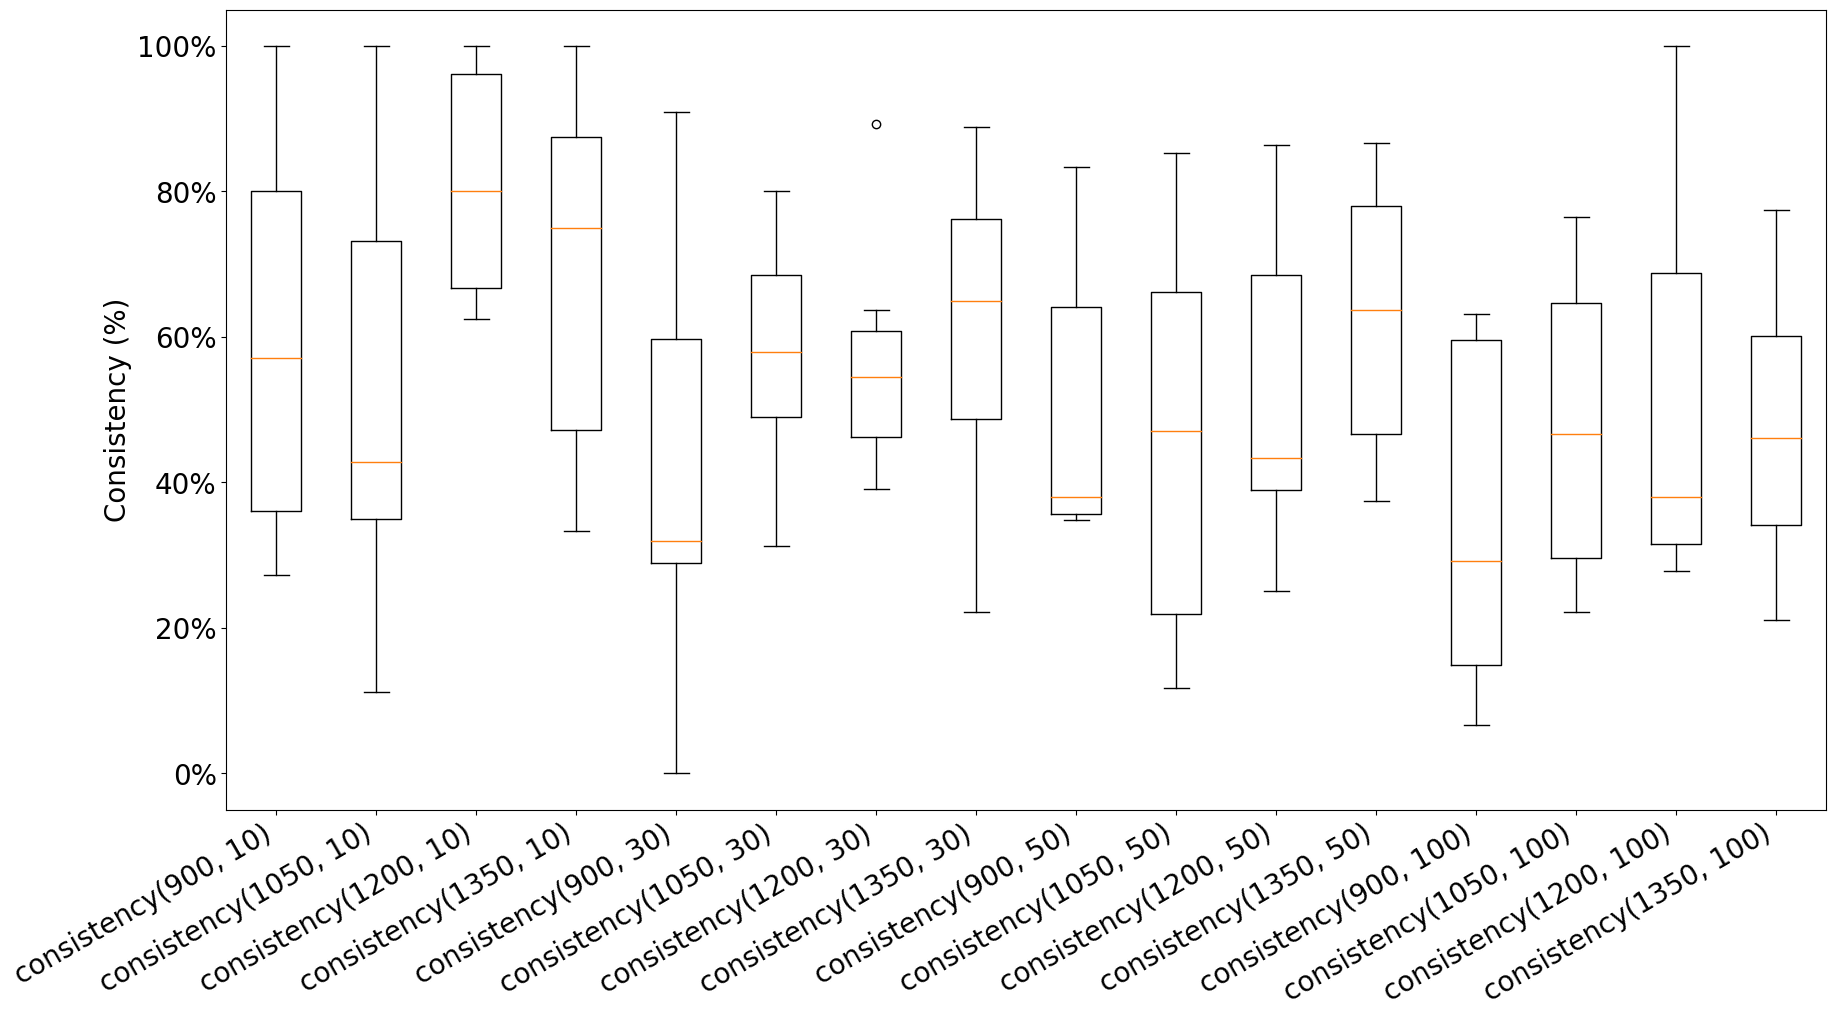

In [13]:
boxPlotter(bothDirNormalizedAllocation)

/home/cc/miniconda3/envs/dds/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]
/home/cc/miniconda3/envs/dds/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


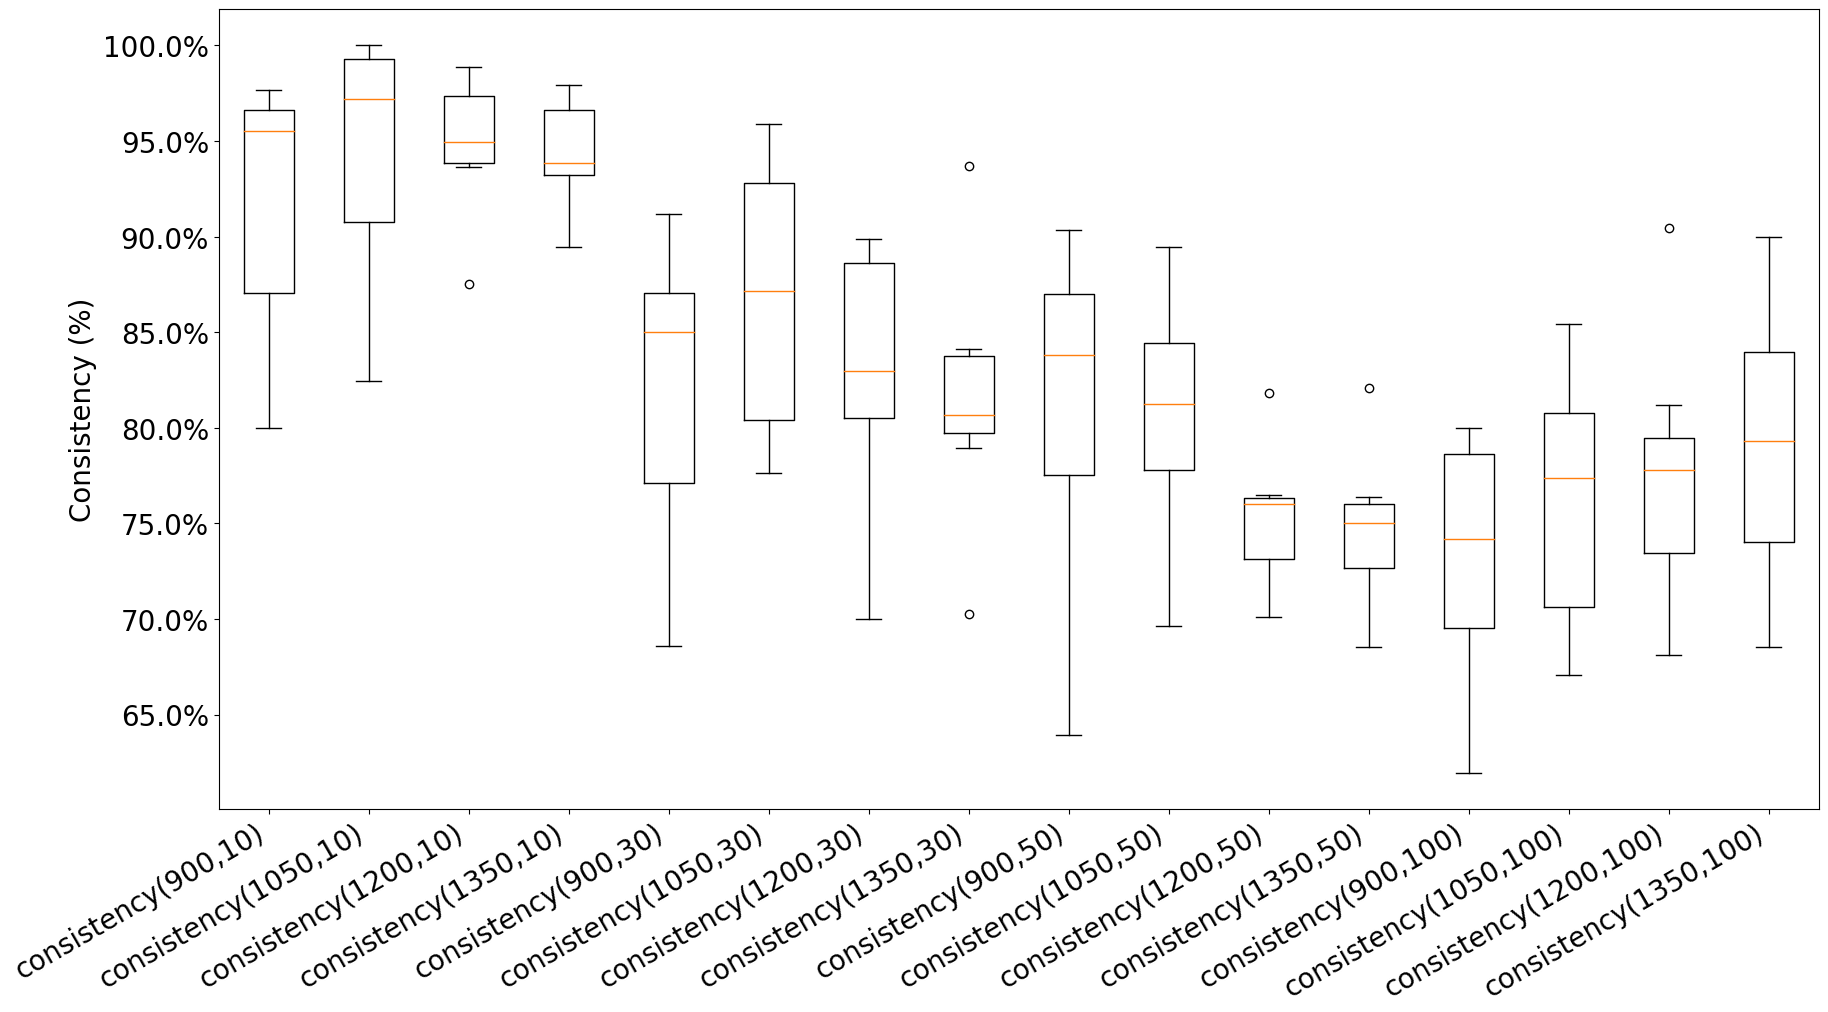

In [22]:
boxPlotter(bothDirNormalizedNormal)

/home/cc/miniconda3/envs/dds/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]
/home/cc/miniconda3/envs/dds/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


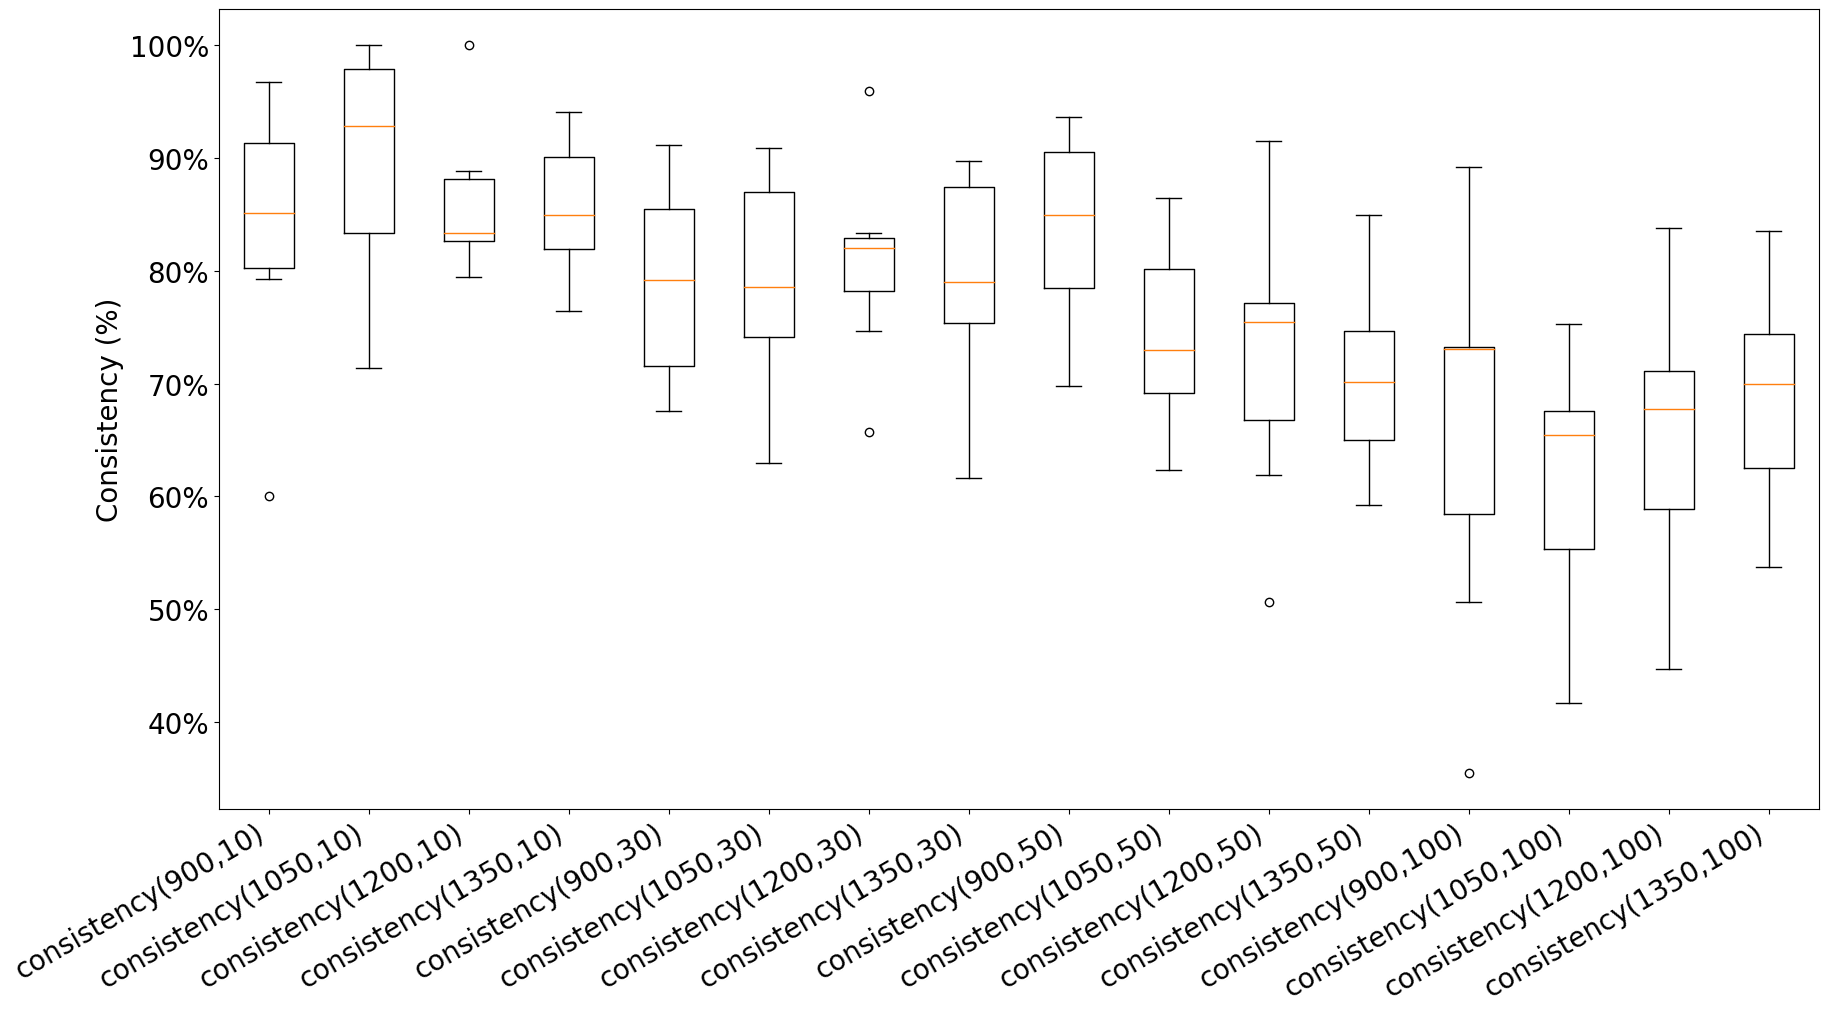

In [23]:
boxPlotter(upwardsDict)